In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Train.csv")
train_data = df.values
X_train = train_data[:,:-1]
Y_train = train_data[:,-1]
print("Features = %d"%X_train.shape[1])

Features = 5


In [3]:
def hypo(X,theta):
    n = X.shape[0]
    ans = theta[0]
    for i in range(n):
        ans += X[i]*theta[i+1]
    return ans

def error(X,Y,theta):
    ans = 0
    for i in range(X.shape[0]):
        ans += (hypo(X[i],theta) - Y[i])**2
    return ans*.5

def gradient(X,Y,theta):
    m = X.shape[0]
    n = X.shape[1]
    grad = np.zeros((n+1,))
    for i in range(m):
        grad[0] += hypo(X[i],theta) - Y[i]
    for j in range(n):
        for i in range(m):
            grad[j+1] += (hypo(X[i],theta) - Y[i])*X[i][j]
    return grad

def multivariate_gradient_descent(X,Y,l = 0.001,threshold = 1e-3):
    n = X.shape[1] + 1
    theta = np.zeros((n,))
    error_list = []
    while True:
        if len(error_list) > 1 and abs(error_list[-1] - error_list[-2]) < threshold:
            break;
        grad = gradient(X,Y,theta)
        error_list.append(error(X,Y,theta))
        theta -= l*grad
    return theta, error_list

def predict(X,theta):
    m = X.shape[0]
    prediction = np.zeros((m,))
    for i in range(m):
        prediction[i] = hypo(X[i],theta)
    return prediction

In [4]:
final_result, error_list = multivariate_gradient_descent(X_train,Y_train)

Hypothesis:  [ 4.9912016  29.68206033 92.66291501  8.28001794 44.76751312  2.51944176]


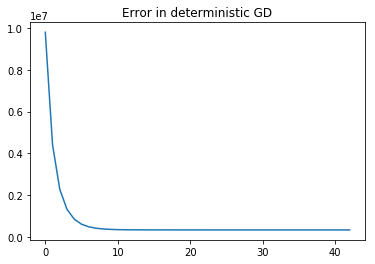

In [100]:
print("Hypothesis: ",final_result)
plt.plot(error_list)
plt.title("Error in deterministic GD")
plt.show()

In [6]:
df = pd.read_csv("Test.csv")
test_data = df.values
X_test = test_data[:,:-1]
Y_test = test_data[:,-1]

In [7]:
def coeff_of_deter(Y_predicted,Y_actual):
    y_mean = Y_actual.mean()
    m = Y_predicted.shape[0]
    res = 0
    tot = 0
    for i in range(m):
        res += (Y_actual[i] - Y_predicted[i])**2
        tot += (Y_actual[i] - y_mean)**2
    return 1-res/tot

In [14]:
train_score = coeff_of_deter(predict(X_train,final_result),Y_train)
test_score = coeff_of_deter(predict(X_test,final_result),Y_test)
print("Score in deterministic GD")
print("Train score: %f"%train_score)
print("Test score: %f"%test_score)

Score in deterministic GD
Train score: 0.966094
Test score: 0.969149


In [81]:
def gradient_mini_batch(X,Y,theta,batch_size):
    m = X.shape[0]
    n = X.shape[1]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    grad = np.zeros((n+1,))
    for i in indices:
        grad[0] += hypo(X[i],theta) - Y[i]
    for j in range(n):
        for i in range(m):
            grad[j+1] += (hypo(X[i],theta) - Y[i])*X[i][j]
    return grad

def multivariate_gradient_descent_mini_batch(X,Y,l = 0.001,threshold = 1,batch_size = 1,epoch_size = 5):
    n = X.shape[1] + 1
    theta = np.zeros((n,))
    error_list = []
    itr = 0
    while True:
        if len(error_list) > 2*epoch_size and itr % batch_size == 0:
            e1 = np.array(error_list[-epoch_size:])
            e2 = np.array(error_list[-2*epoch_size:-epoch_size])
            if abs(e1.mean() - e2.mean()) < threshold:
                break
        grad = gradient_mini_batch(X,Y,theta,batch_size)
        error_list.append(error(X,Y,theta))
        theta -= l*grad
        itr += 1
    return theta, error_list

In [82]:
final_result_mini_batch, error_list_mini_batch = multivariate_gradient_descent_mini_batch(X_train,Y_train)

Hypothesis:  [ 1.11637843 29.69032372 92.55137082  8.10896785 44.60965144  2.55474145]


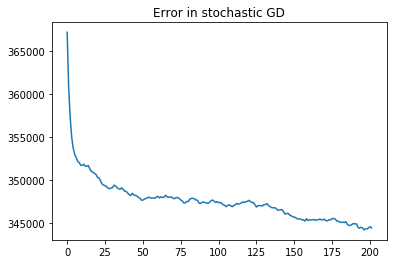

In [96]:
print("Hypothesis: ",final_result_mini_batch)
plt.plot(error_list_mini_batch[10:])
plt.title("Error in stochastic GD")
plt.show()

In [84]:
train_score = coeff_of_deter(predict(X_train,final_result_mini_batch),Y_train)
test_score = coeff_of_deter(predict(X_test,final_result_mini_batch),Y_test)
print("Score in stochastic GD")
print("Train score: %f"%train_score)
print("Test score: %f"%test_score)

Score in stochastic GD
Train score: 0.964875
Test score: 0.967133
